In [13]:
import pyodbc
import sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt


In [14]:
# Kết nối đến cơ sở dữ liệu SQL Server
engine = create_engine('mssql+pyodbc://DESKTOP-CD1J161\\TRIET/Quantium?driver=SQL+Server')


# Truy vấn SQL để lấy dữ liệu từ cơ sở dữ liệu
query = "SELECT BUYDATE, TOTAL_RN FROM dbo.REVENUE order by BUYDATE "

query1 = "SELECT * FROM dbo.TABLEFIXDATE"

query2 = "SELECT * FROM dbo.SIZEBUY order by SIZE"

query3 = "SELECT LIFESTAGE, PREMIUM_CUSTOMER, TOT_SALES, LYLTY_CARD_NBR, PROD_QTY  FROM dbo.TOTALDATA "

# Sử dụng pandas để đọc dữ liệu từ kết quả truy vấn vào DataFrame
df = pd.read_sql(query, engine)

df2 = pd.read_sql(query2, engine)

df3 = pd.read_sql(query3, engine)

# Đóng kết nối sau khi hoàn thành
engine.dispose()

In [15]:
# Chuyển đổi cột 'BUYDATE' thành kiểu datetime64[ns]
df['BUYDATE'] = pd.to_datetime(df['BUYDATE'])

# In ra DataFrame để kiểm tra dữ liệu
print(df.head())

     BUYDATE  TOTAL_RN
0 2018-07-01    5372.2
1 2018-07-02    5315.4
2 2018-07-03    5321.8
3 2018-07-04    5309.9
4 2018-07-05    5080.9


In [16]:
# Tạo DataFrame df_date với cột 'BUYDATE' là chuỗi ngày trong khoảng từ '2018-07-01' đến '2019-06-30'
df_date = pd.DataFrame({'BUYDATE': pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')})

# Chuyển đổi cột 'BUYDATE' thành kiểu datetime64[ns]
df_date['BUYDATE'] = pd.to_datetime(df_date['BUYDATE'])


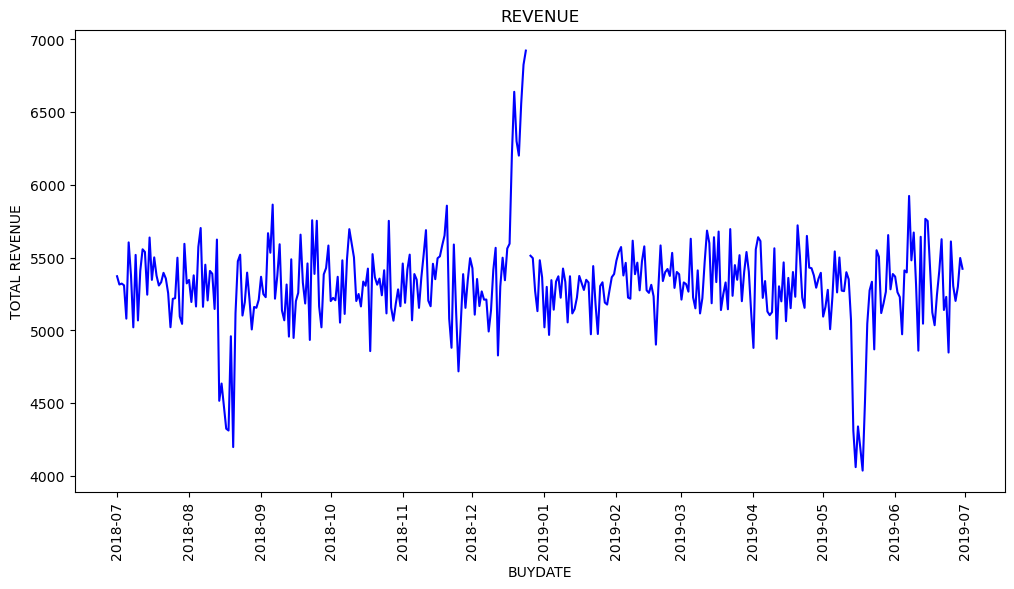

In [17]:
# vẽ biểu đồ phát sinh giao dịch để tìm ra ngày bị thiếu

merged_df = pd.merge(df_date, df, on='BUYDATE', how='left')  # Chọn 'left' để giữ toàn bộ chuỗi ngày

plt.figure(figsize= (12,6))
plt.plot(merged_df['BUYDATE'], merged_df['TOTAL_RN'], linestyle='-', color='b', label='Line 1')
plt.xlabel('BUYDATE')
plt.ylabel('TOTAL REVENUE')
plt.title('REVENUE')
plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [18]:
# Lọc dữ liệu cho những ngày trong tháng 12/2018
dec_2018_data = merged_df[(merged_df['BUYDATE'].dt.year == 2018) & (merged_df['BUYDATE'].dt.month == 12)]
print(dec_2018_data)

# dựa vào dữ liệu này thây được ngày bị thiếu là ngày 25/12/2018 và này là ngày giáng sinh nên các cửa hàng sẽ đóng cửa và có thể kết luận rằng không bị thiếu số liệu nào cả


       BUYDATE  TOTAL_RN
153 2018-12-01    5427.6
154 2018-12-02    5108.2
155 2018-12-03    5353.3
156 2018-12-04    5167.3
157 2018-12-05    5268.0
158 2018-12-06    5211.4
159 2018-12-07    5212.1
160 2018-12-08    4992.5
161 2018-12-09    5137.2
162 2018-12-10    5416.1
163 2018-12-11    5567.6
164 2018-12-12    4827.9
165 2018-12-13    5301.9
166 2018-12-14    5499.6
167 2018-12-15    5344.9
168 2018-12-16    5562.9
169 2018-12-17    5595.8
170 2018-12-18    6209.6
171 2018-12-19    6639.8
172 2018-12-20    6300.8
173 2018-12-21    6201.3
174 2018-12-22    6558.7
175 2018-12-23    6826.0
176 2018-12-24    6923.0
177 2018-12-25       NaN
178 2018-12-26    5513.1
179 2018-12-27    5496.6
180 2018-12-28    5269.9
181 2018-12-29    5132.4
182 2018-12-30    5482.3
183 2018-12-31    5365.6


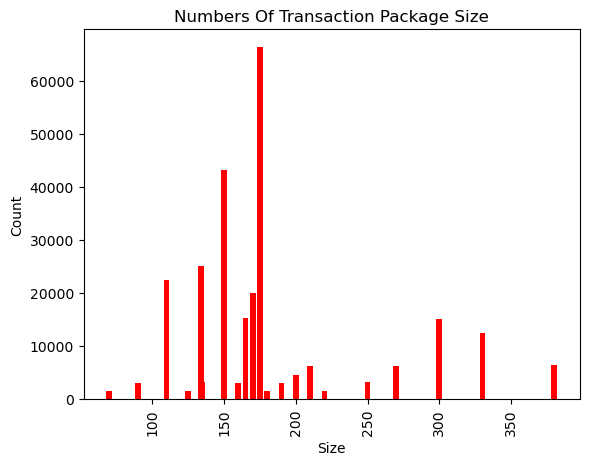

In [19]:
# vẽ biểu đồ pack-size

plt.bar(df2['SIZE'], df2['SizeCount'], color='Red', width = 4,)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Numbers Of Transaction Package Size')
plt.xticks(rotation='vertical')  # Xoay nhãn trục x để dễ đọc
plt.show()


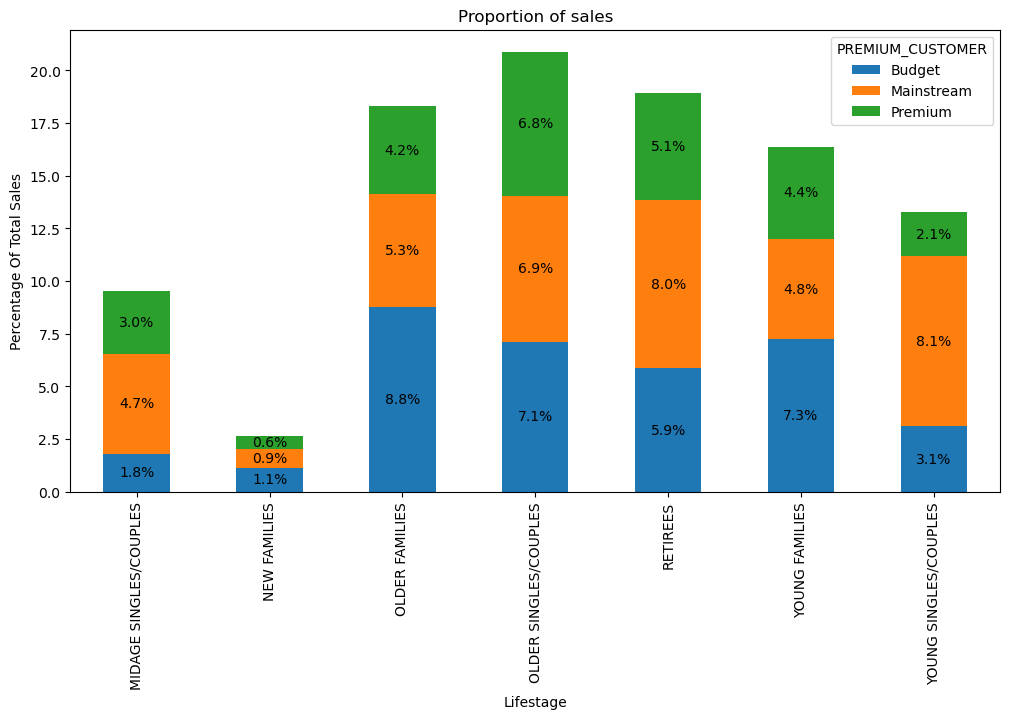

In [20]:

# vẽ biểu đồ propotion of sales
# Tính tổng số doanh số bán hàng
total_sales = df3['TOT_SALES'].sum()

# Tính tỷ lệ phần trăm của doanh số bán hàng của mỗi nhóm so với tổng doanh số bán hàng
df3['Sales_Percentage'] = df3['TOT_SALES'] / total_sales * 100

# Tạo pivot table cho dữ liệu
pivot_df_sale = df3.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Sales_Percentage', aggfunc='sum')

# Vẽ biểu đồ cột chồng
ax = pivot_df_sale.plot(kind='bar', stacked=True, figsize=(12, 6))

# Đặt tiêu đề và nhãn

plt.xlabel('Lifestage')
plt.ylabel('Percentage Of Total Sales')
plt.title('Proportion of sales')

# Hiển thị phần trăm trên từng cột
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Hiển thị biểu đồ
plt.show()


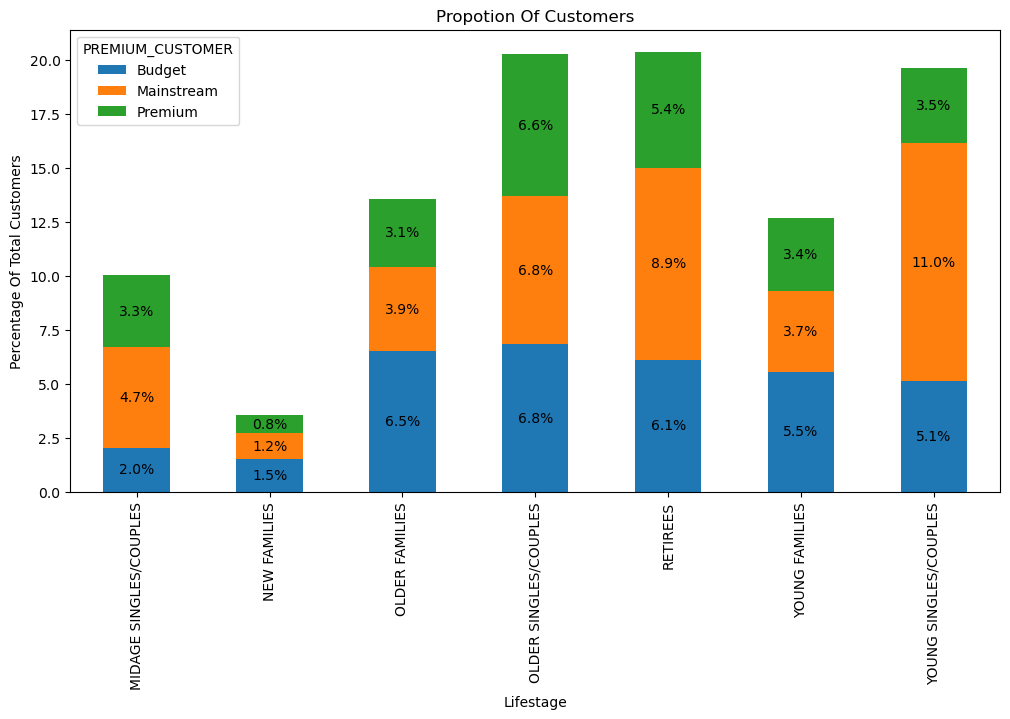

In [21]:

# vẽ biểu đồ propotion of customers

# Tính số lượng khách hàng duy nhất cho mỗi cặp giá trị của cột LIFESTAGE và PREMIUM_CUSTOMER
unique_customers_per_group = df3.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Tính tổng số lượng khách hàng duy nhất
total_unique_customers = unique_customers_per_group['LYLTY_CARD_NBR'].sum()

# Tạo một cột mới để tính phần trăm lượng khách của mỗi nhóm
unique_customers_per_group['Customer_Percentage'] = (unique_customers_per_group['LYLTY_CARD_NBR'] / total_unique_customers) * 100

# Tạo pivot table cho dữ liệu
pivot_df_cus = unique_customers_per_group.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Customer_Percentage', aggfunc='sum')

# Vẽ biểu đồ cột chồng
ax = pivot_df_cus.plot(kind='bar', stacked=True, figsize=(12, 6))

# Đặt tiêu đề và nhãn
plt.xlabel('Lifestage')
plt.ylabel('Percentage Of Total Customers')
plt.title('Propotion Of Customers')

# Hiển thị phần trăm trên từng cột
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Hiển thị biểu đồ
plt.show()


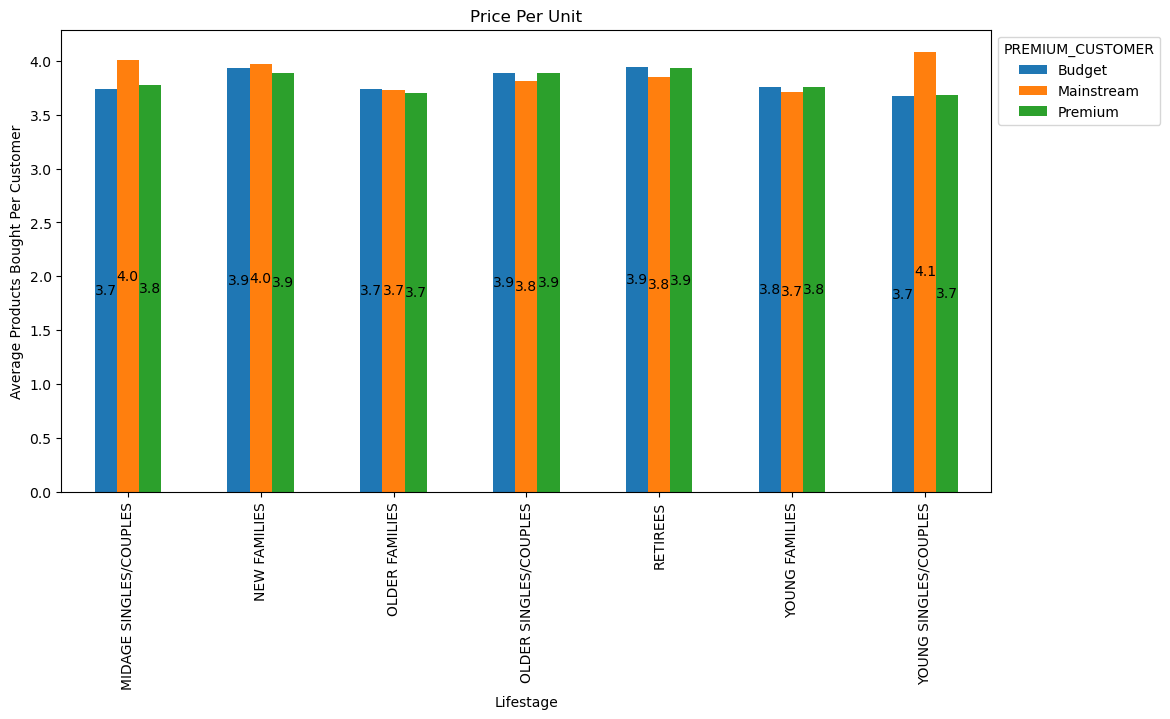

In [23]:
# vẽ biểu đồ Price per unit

 #Tính tổng số lượng sản phẩm đã mua cho mỗi nhóm
total_products_bought = df3.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Tính tổng doanh số cho mỗi nhóm
total_sales_per_group = df3.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Tính giá trung bình cho mỗi sản phẩm
total_products_bought['Price_per_unit'] = total_sales_per_group['TOT_SALES'] / total_products_bought['PROD_QTY']

# Tạo pivot table cho dữ liệu
pivot_df_BPC = total_products_bought.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Price_per_unit', aggfunc='sum')

# Vẽ biểu đồ
ax = pivot_df_BPC.plot(kind='bar', stacked=False, figsize=(12, 6))

# Đặt tiêu đề và nhãn
plt.xlabel('Lifestage')
plt.ylabel('Average Products Bought Per Customer')
plt.title('Price Per Unit')

# Hiển thị chỉ số trên từng cột
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}', (x + width / 2, y + height / 2), ha='center', va='center')

# Đặt bảng chú thích PREMIUM_CUSTOMER bên ngoài biểu đồ
ax.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1, 1))

# Hiển thị biểu đồ
plt.show()

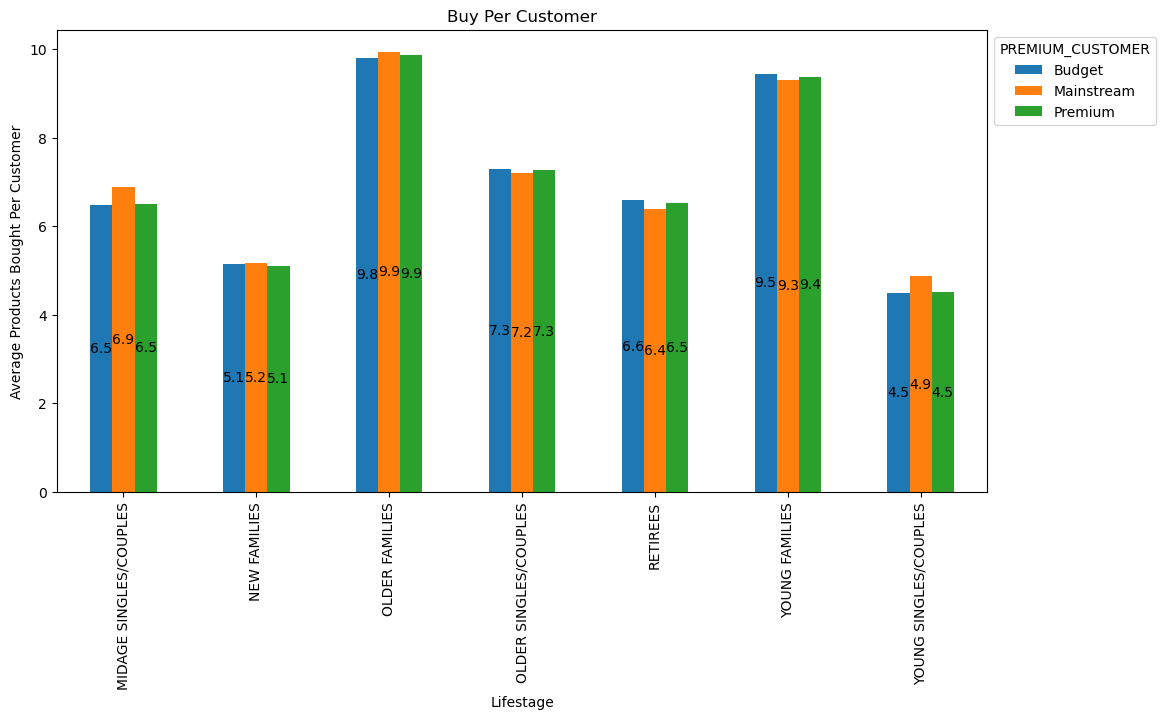

In [24]:
# vẽ biểu đồ Buy per Customer

# Tính tổng số lượng sản phẩm đã mua cho mỗi nhóm
total_products_bought = df3.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Tính số lượng khách hàng duy nhất cho mỗi nhóm
unique_customers_per_group = df3.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Tính tỉ lệ mua hàng trung bình cho mỗi nhóm
unique_customers_per_group['Buy_per_customers'] = total_products_bought['PROD_QTY'] / unique_customers_per_group['LYLTY_CARD_NBR']

# Tạo pivot table cho dữ liệu
pivot_df_BPC = unique_customers_per_group.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Buy_per_customers', aggfunc='sum')

# Vẽ biểu đồ cột chồng
ax = pivot_df_BPC.plot(kind='bar', stacked=False, figsize=(12, 6))

# Đặt tiêu đề và nhãn
plt.xlabel('Lifestage')
plt.ylabel('Average Products Bought Per Customer')
plt.title('Buy Per Customer')

# Hiển thị chỉ số trên từng cột

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}', (x + width / 2, y + height / 2), ha='center', va='center')

# Đặt bảng chú thích PREMIUM_CUSTOMER bên ngoài biểu đồ
ax.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1, 1))

# Hiển thị biểu đồ
plt.show()